<a href="https://colab.research.google.com/github/hrhodaeian/INSE-6220-Project/blob/main/GOOD_Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [1]:
# install slim version (default): if you get an error message, run it again one or more times: 
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 21.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.2 MB/s eta 0:00:00
   

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

## **Principal Component Analysis**

PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [12]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/hrhodaeian/INSE-6220-Project/main/Pizza.csv')
df.head(25)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0      A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1      A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2      A  14025  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3      A  14016  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4      A  14005  30.49  21.28  41.65  4.82    1.64  1.76  4.67
5      A  14075  31.14  20.23  42.31  4.92    1.65  1.40  4.67
6      A  14082  31.21  20.97  41.34  4.71    1.58  1.77  4.63
7      A  14097  28.76  21.41  41.60  5.28    1.75  2.95  4.72
8      A  14117  28.22  20.48  45.10  5.02    1.71  1.18  4.93
9      A  14133  27.72  21.19  45.29  5.16    1.66  0.64  4.95
10     A  14101  27.35  21.20  45.59  4.94    1.65  0.92  4.98
11     A  14108  26.98  21.20  45.03  5.15    1.67  1.64  4.97
12     A  14164  28.70  20.00  45.12  4.93    1.56  1.25  4.91
13     A  14154  30.91  19.65  42.45  4.81    1.65  2.81  4.72
14     A  24005  30.91  20.77  42.03  4.90    1.61  1.39  4.67
15     A  24026  30.83  17.88  44.33  5.26    1.76  1.70  4.77
16     A  24094  32.73  20.06  39.74  5.24    1.69  2.23  4.47
17     A  24108  34.58  17.53  40.87  5.05    1.61  1.97  4.46
18     A  24102  31.80  20.35  40.44  5.43    1.61  1.98  4.53
19     A  24082  31.02  19.05  42.29  5.27    1.71  2.37  4.66
20     A  34017  27.02  19.56  47.20  4.95    1.65  1.27  5.08
21     A  34020  27.78  20.01  45.59  4.97    1.70  1.65  4.97
22     A  24136  30.88  20.58  42.26  4.96    1.63  1.32  4.68
23     A  24122  32.20  19.25  43.42  4.62    1.50  0.51  4.70
24     A  24115  33.19  18.05  41.88  5.22    1.70  1.66  4.56

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [14]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  5


In [15]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

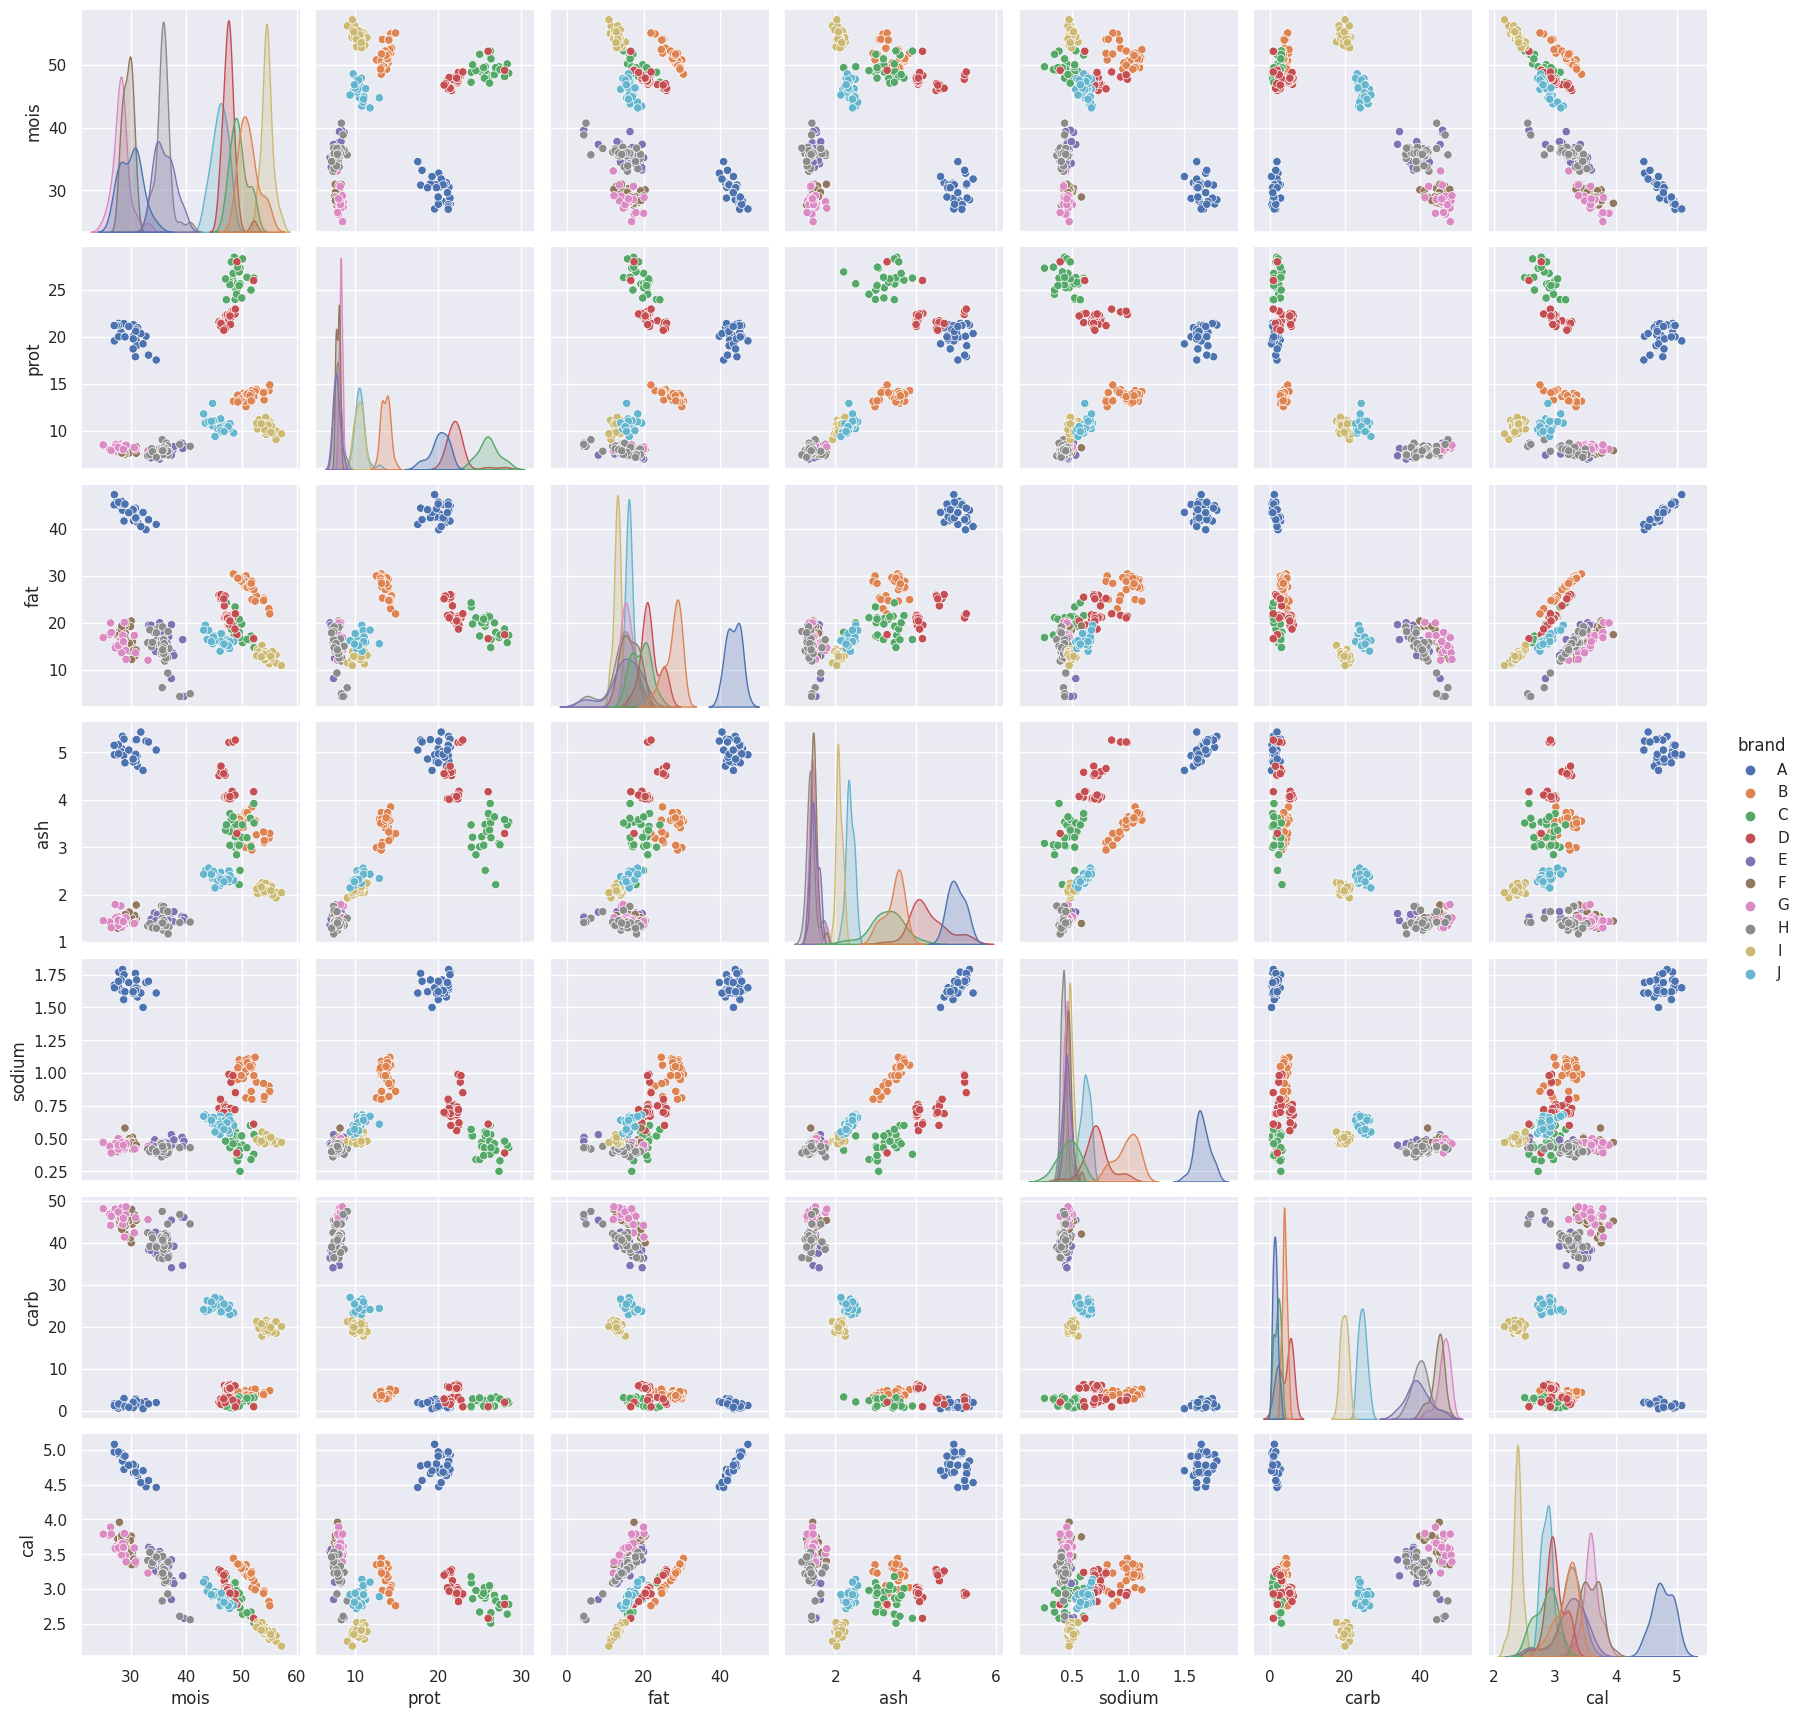

In [16]:
# Ommiting the ID column
df=df.drop(['id'], axis=1)

# Pair Plot
sns.pairplot(df, hue='brand')
plt.show()

# Defining the class column
y = df['brand']
target = df['brand'].to_numpy()

# Converting categorial classification to numerical classification
df['brand'].replace(['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J'],[1,2,3,4,5,6,7,8,9,10], inplace=True)


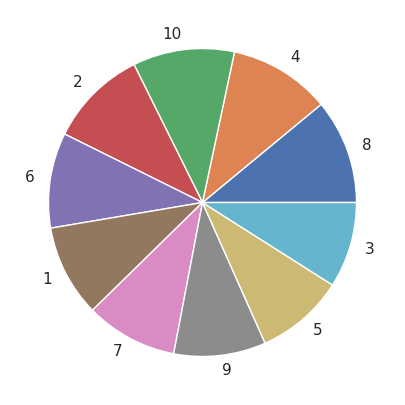

In [18]:
y =df['brand']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [20]:
X = df.drop(columns=['brand'])
X.head(10)

mois   prot    fat   ash  sodium  carb   cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4  30.49  21.28  41.65  4.82    1.64  1.76  4.67
5  31.14  20.23  42.31  4.92    1.65  1.40  4.67
6  31.21  20.97  41.34  4.71    1.58  1.77  4.63
7  28.76  21.41  41.60  5.28    1.75  2.95  4.72
8  28.22  20.48  45.10  5.02    1.71  1.18  4.93
9  27.72  21.19  45.29  5.16    1.66  0.64  4.95

In [21]:
X.describe().transpose()

count       mean        std    min      25%     50%      75%    max
mois    300.0  40.903067   9.552987  25.00  30.9025  43.300  49.1150  57.22
prot    300.0  13.373567   6.434392   6.98   8.0600  10.440  20.0225  28.48
fat     300.0  20.229533   8.975658   4.38  14.7700  17.135  21.4350  47.20
ash     300.0   2.633233   1.269724   1.17   1.4500   2.225   3.5925   5.43
sodium  300.0   0.669400   0.370358   0.25   0.4500   0.490   0.7025   1.79
carb    300.0  22.864767  18.029722   0.51   3.4675  23.245  41.3375  48.64
cal     300.0   3.271000   0.620034   2.18   2.9100   3.215   3.5200   5.08

**Standardize the Data**

In [23]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

mois      prot       fat       ash    sodium      carb       cal
0 -1.371815  1.254181  2.749841  1.953894  2.976687 -1.227511  2.680129
1 -1.301562  1.227717  2.640475  2.135338  3.030779 -1.213622  2.534733
2 -1.316242  1.030010  2.851396  1.930227  2.598042 -1.225844  2.712439
3 -1.085563  1.054918  2.555660  1.701449  2.543950 -1.193622  2.373183
4 -1.091854  1.230830  2.390494  1.725116  2.625088 -1.172510  2.260097
5 -1.023699  1.067372  2.464149  1.804005  2.652134 -1.192510  2.260097
6 -1.016359  1.182571  2.355898  1.638338  2.462812 -1.171954  2.195477
7 -1.273252  1.251068  2.384914  2.088005  2.922595 -1.106398  2.340872
8 -1.329873  1.106290  2.775509  1.882894  2.814410 -1.204733  2.680129
9 -1.382300  1.216819  2.796713  1.993338  2.679180 -1.234733  2.712439

In [24]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
mois    300.0  4.736952e-17  1.001671 -1.667503 -1.048601  0.251329  0.861056   
prot    300.0  0.000000e+00  1.001671 -0.995315 -0.827187 -0.456682  1.035069   
fat     300.0  0.000000e+00  1.001671 -1.768786 -0.609276 -0.345346  0.134528   
ash     300.0  9.473903e-17  1.001671 -1.154329 -0.933440 -0.322051  0.756755   
sodium  300.0 -4.736952e-17  1.001671 -1.134311 -0.593390 -0.485206  0.089522   
carb    300.0  0.000000e+00  1.001671 -1.241956 -1.077647  0.021124  1.026283   
cal     300.0 -4.736952e-17  1.001671 -1.762520 -0.583199 -0.090468  0.402262   

             max  
mois    1.710899  
prot    2.351687  
fat     3.009866  
ash     2.206338  
sodium  3.030779  
carb    1.431985  
cal     2.922456

**Observations and variables**

In [25]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

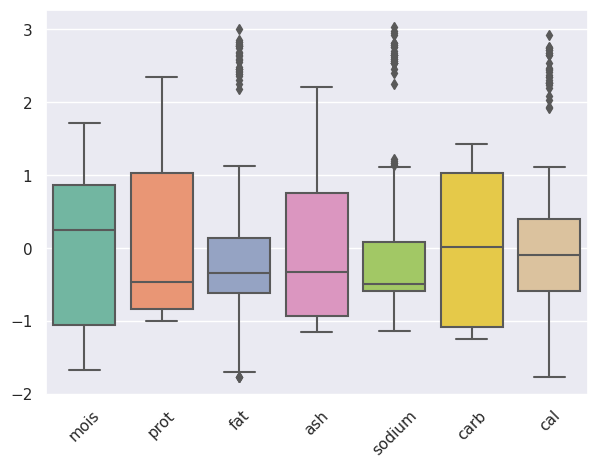

In [26]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


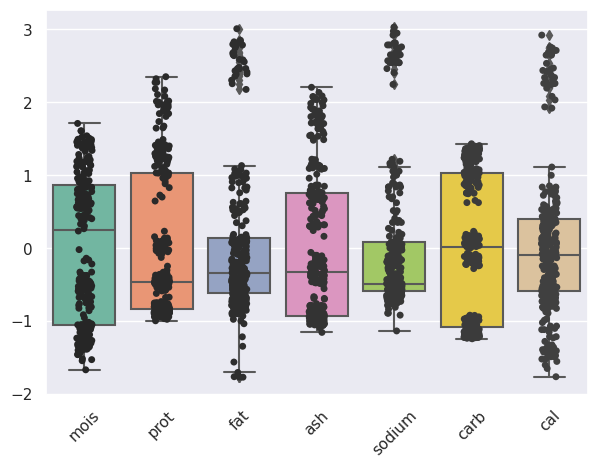

In [27]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

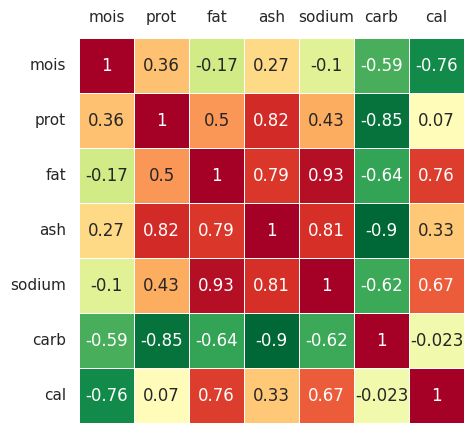

In [28]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

Text(0, 0.5, '$Z_2$')

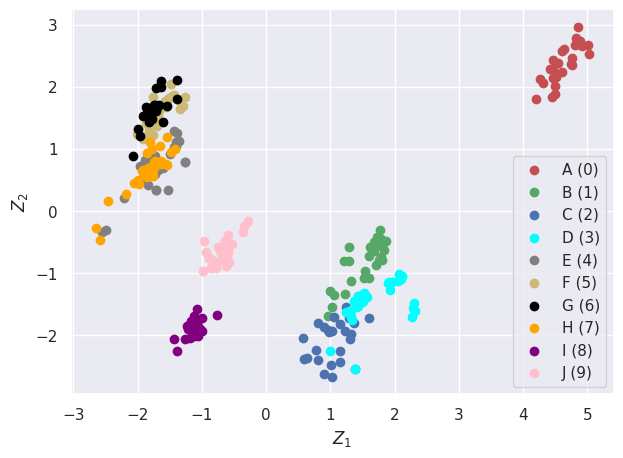

In [30]:
pca = PCA()
Z = pca.fit_transform(X)

idx_A = np.where(y == 1)
idx_B = np.where(y == 2)
idx_C = np.where(y == 3)
idx_D = np.where(y == 4)
idx_E = np.where(y == 5)
idx_F = np.where(y == 6)
idx_G = np.where(y == 7)
idx_H = np.where(y == 8)
idx_I = np.where(y == 9)
idx_J = np.where(y == 10)

# Scatter Plot
plt. figure()
plt.scatter(Z[idx_A,0], Z[idx_A,1], c='r', label='A (0)')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='g', label='B (1)')
plt.scatter(Z[idx_C,0], Z[idx_C,1], c='b', label='C (2)')
plt.scatter(Z[idx_D,0], Z[idx_D,1], c='cyan', label='D (3)')
plt.scatter(Z[idx_E,0], Z[idx_E,1], c='gray', label='E (4)')
plt.scatter(Z[idx_F,0], Z[idx_F,1], c='y', label='F (5)')
plt.scatter(Z[idx_G,0], Z[idx_G,1], c='black', label='G (6)')
plt.scatter(Z[idx_H,0], Z[idx_H,1], c='orange', label='H (7)')
plt.scatter(Z[idx_I,0], Z[idx_I,1], c='purple', label='I (8)')
plt.scatter(Z[idx_J,0], Z[idx_J,1], c='pink', label='J (9)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

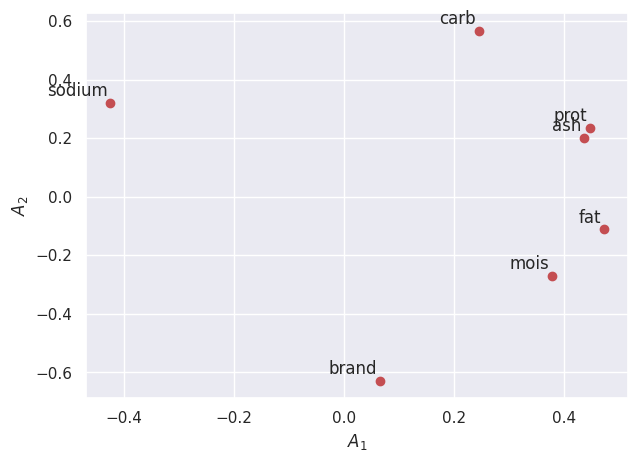

In [31]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


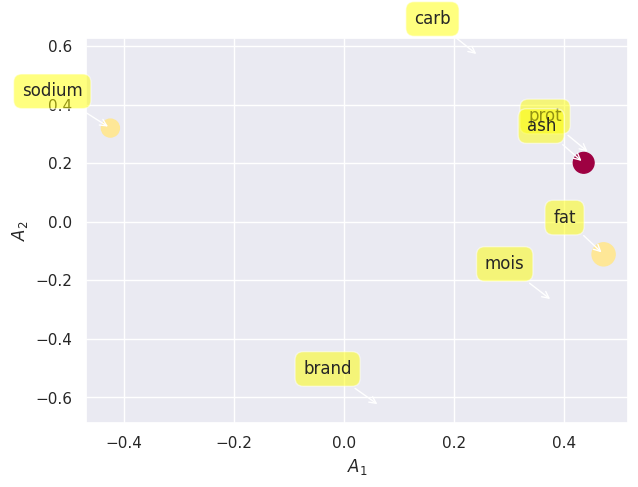

In [32]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

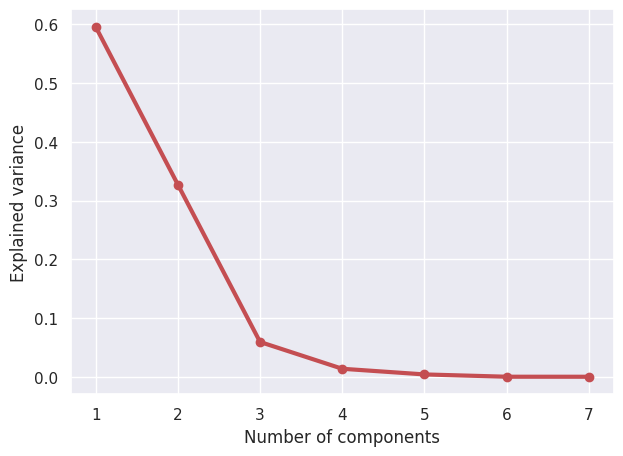

In [33]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

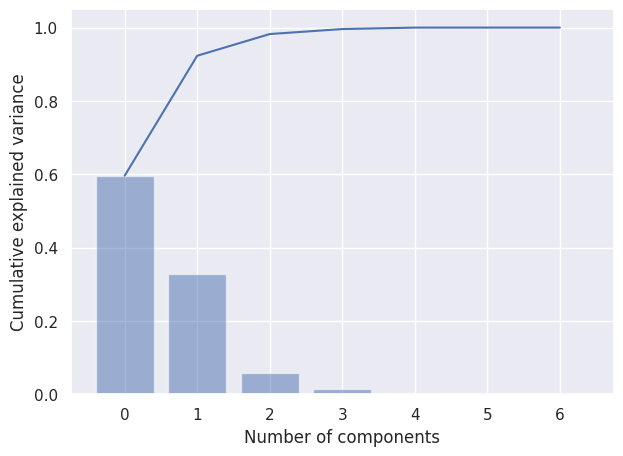

In [34]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

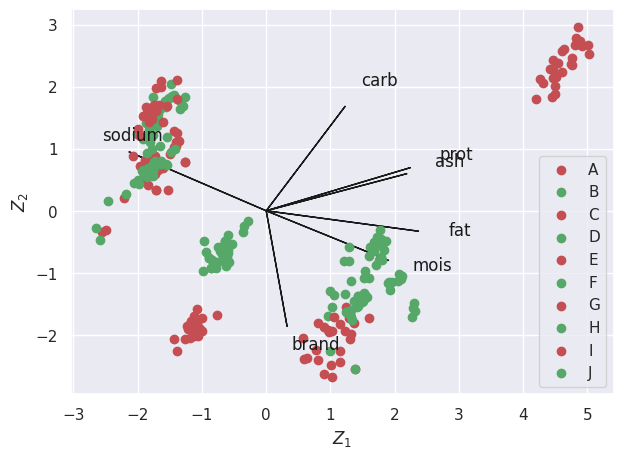

In [37]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
plt.scatter(Z[idx_A,0], Z[idx_A,1], c='r', label='A')
plt.scatter(Z[idx_B,0], Z[idx_B,1], c='g', label='B')
plt.scatter(Z[idx_C,0], Z[idx_C,1], c='r', label='C')
plt.scatter(Z[idx_D,0], Z[idx_D,1], c='g', label='D')
plt.scatter(Z[idx_E,0], Z[idx_E,1], c='r', label='E')
plt.scatter(Z[idx_F,0], Z[idx_F,1], c='g', label='F')
plt.scatter(Z[idx_G,0], Z[idx_G,1], c='r', label='G')
plt.scatter(Z[idx_H,0], Z[idx_H,1], c='g', label='H')
plt.scatter(Z[idx_I,0], Z[idx_I,1], c='r', label='I')
plt.scatter(Z[idx_J,0], Z[idx_J,1], c='g', label='J')
plt.legend(loc='lower right')

##**Using PCA Library**

In [38]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [40]:
out['PC']

PC1       PC2       PC3
0    5.010343  2.679215 -0.039327
1    5.023755  2.529295 -0.097056
2    4.805439  2.673700 -0.075475
3    4.469543  2.285029 -0.120233
4    4.471893  2.159152 -0.000738
..        ...       ...       ...
295 -0.535510 -0.530843 -0.426490
296 -0.339636 -0.243230 -0.281174
297 -0.646433 -0.515434 -0.370378
298 -0.865078 -0.921790 -0.493755
299 -0.895868 -0.767878 -0.530108

[300 rows x 3 columns]

**Scatter plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.59%] of the variance'}, xlabel='PC1 (59.5% expl.var)', ylabel='PC2 (32.7% expl.var)'>)

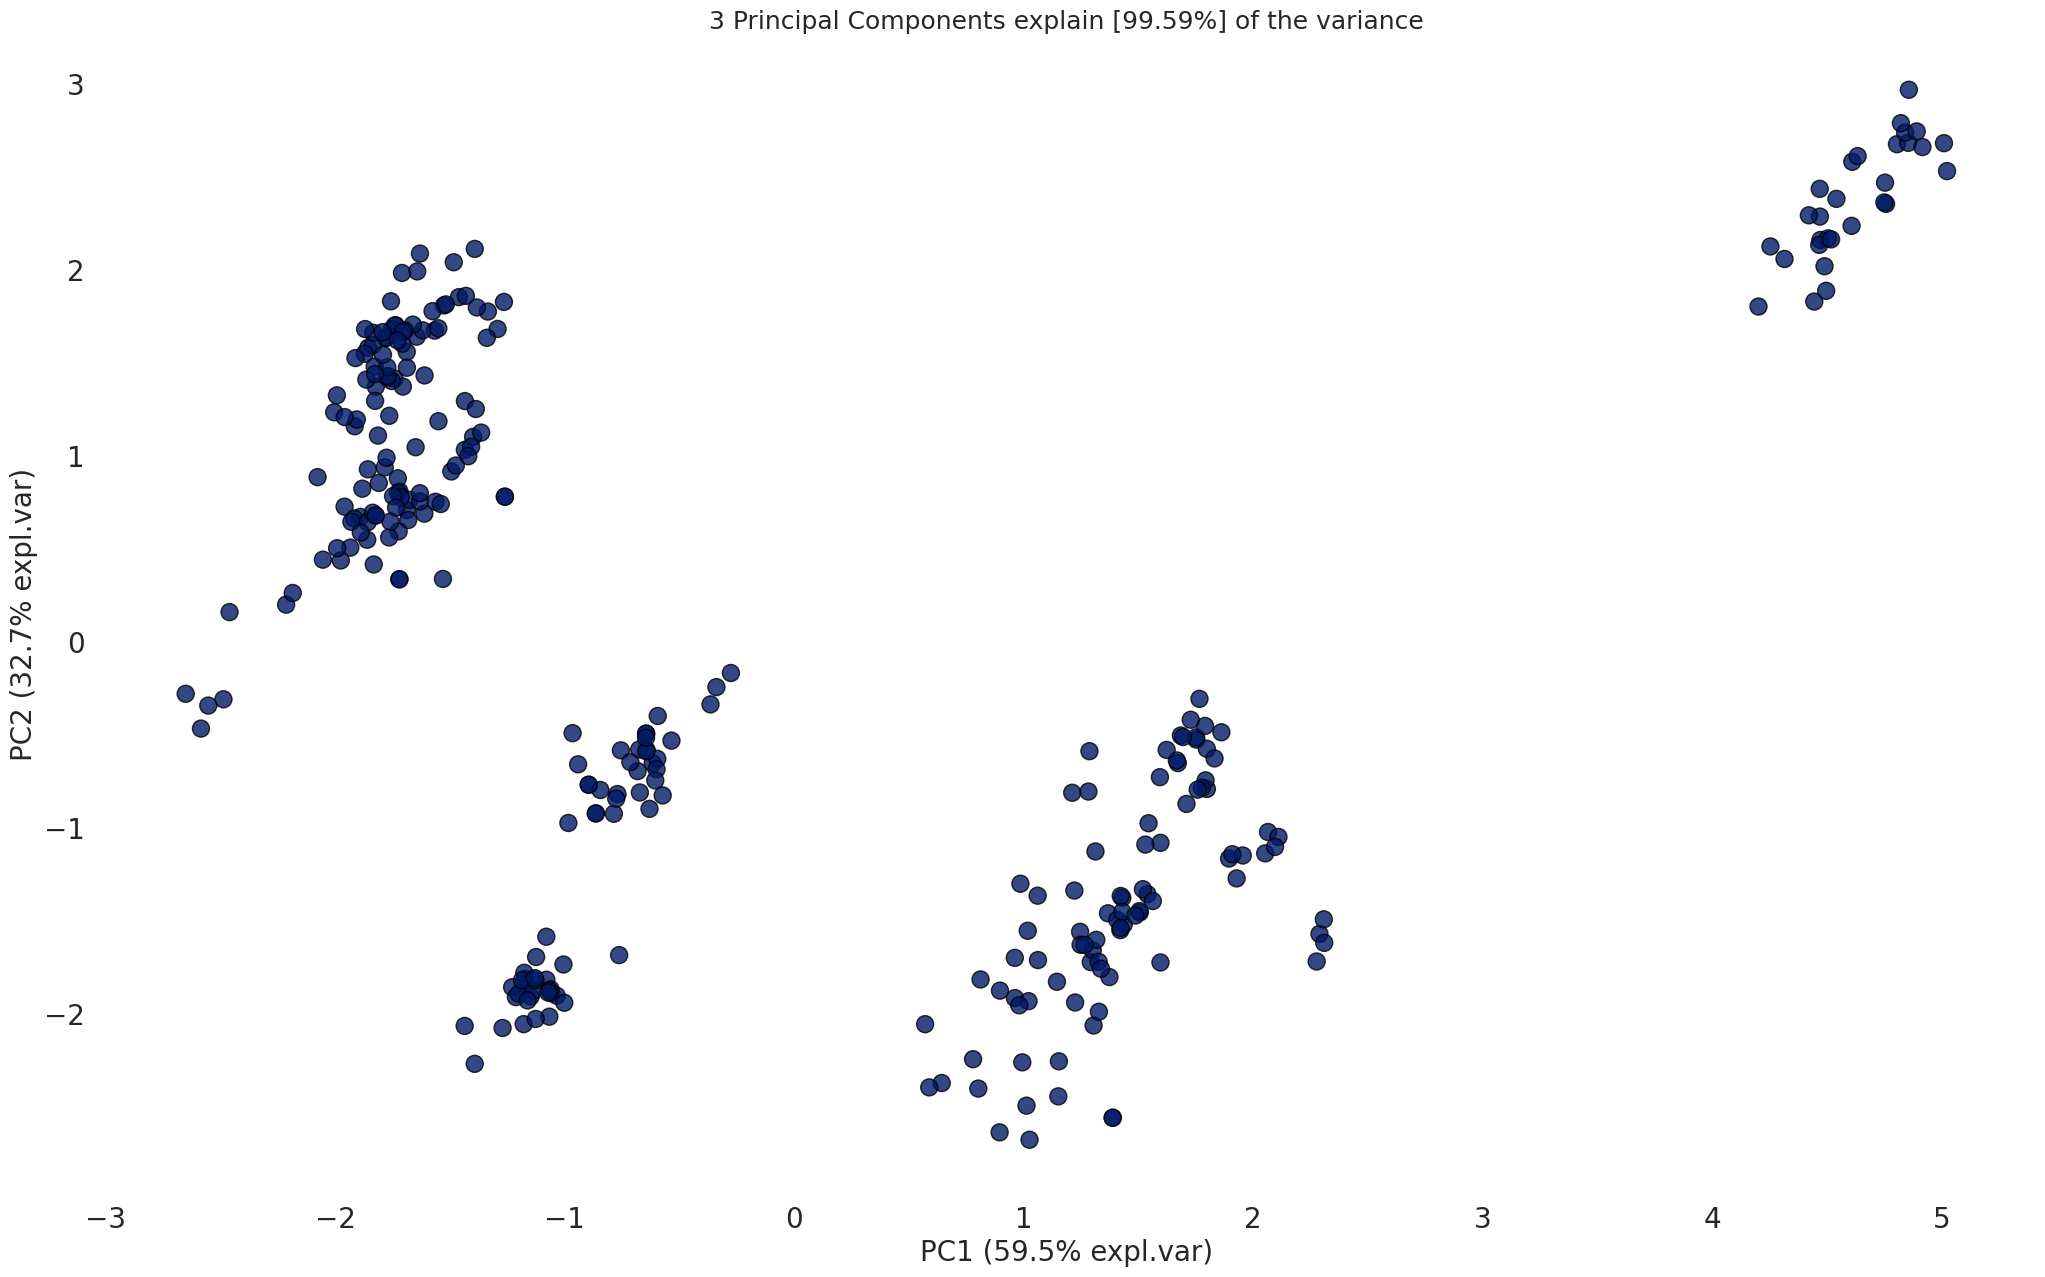

In [41]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [42]:
A = out['loadings'].T

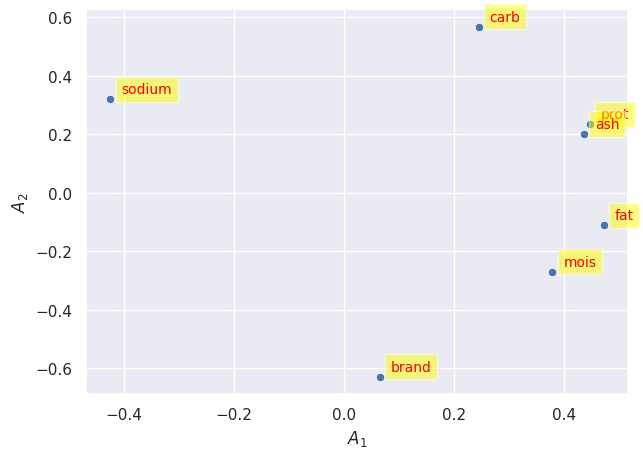

In [43]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

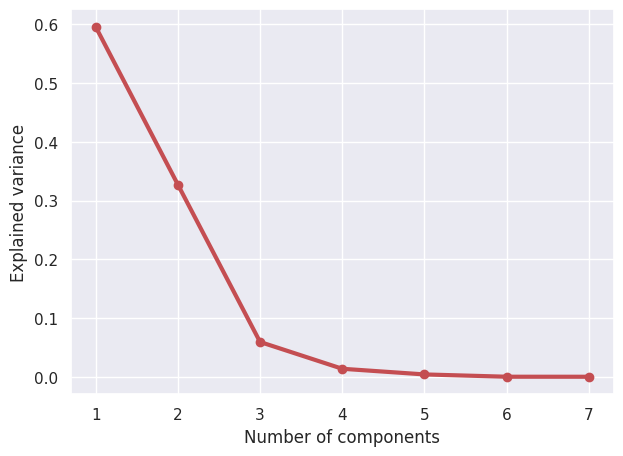

In [44]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

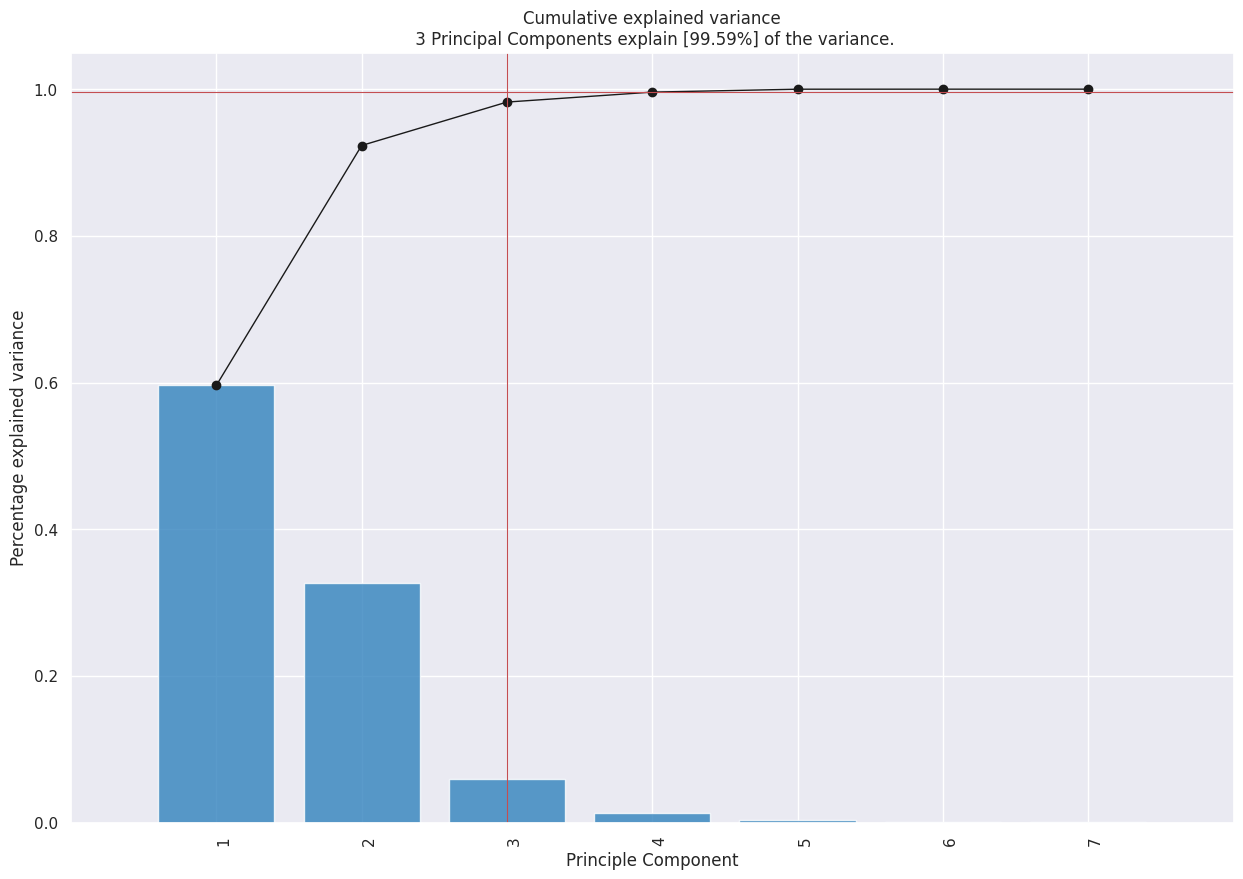

<Figure size 700x500 with 0 Axes>

In [45]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


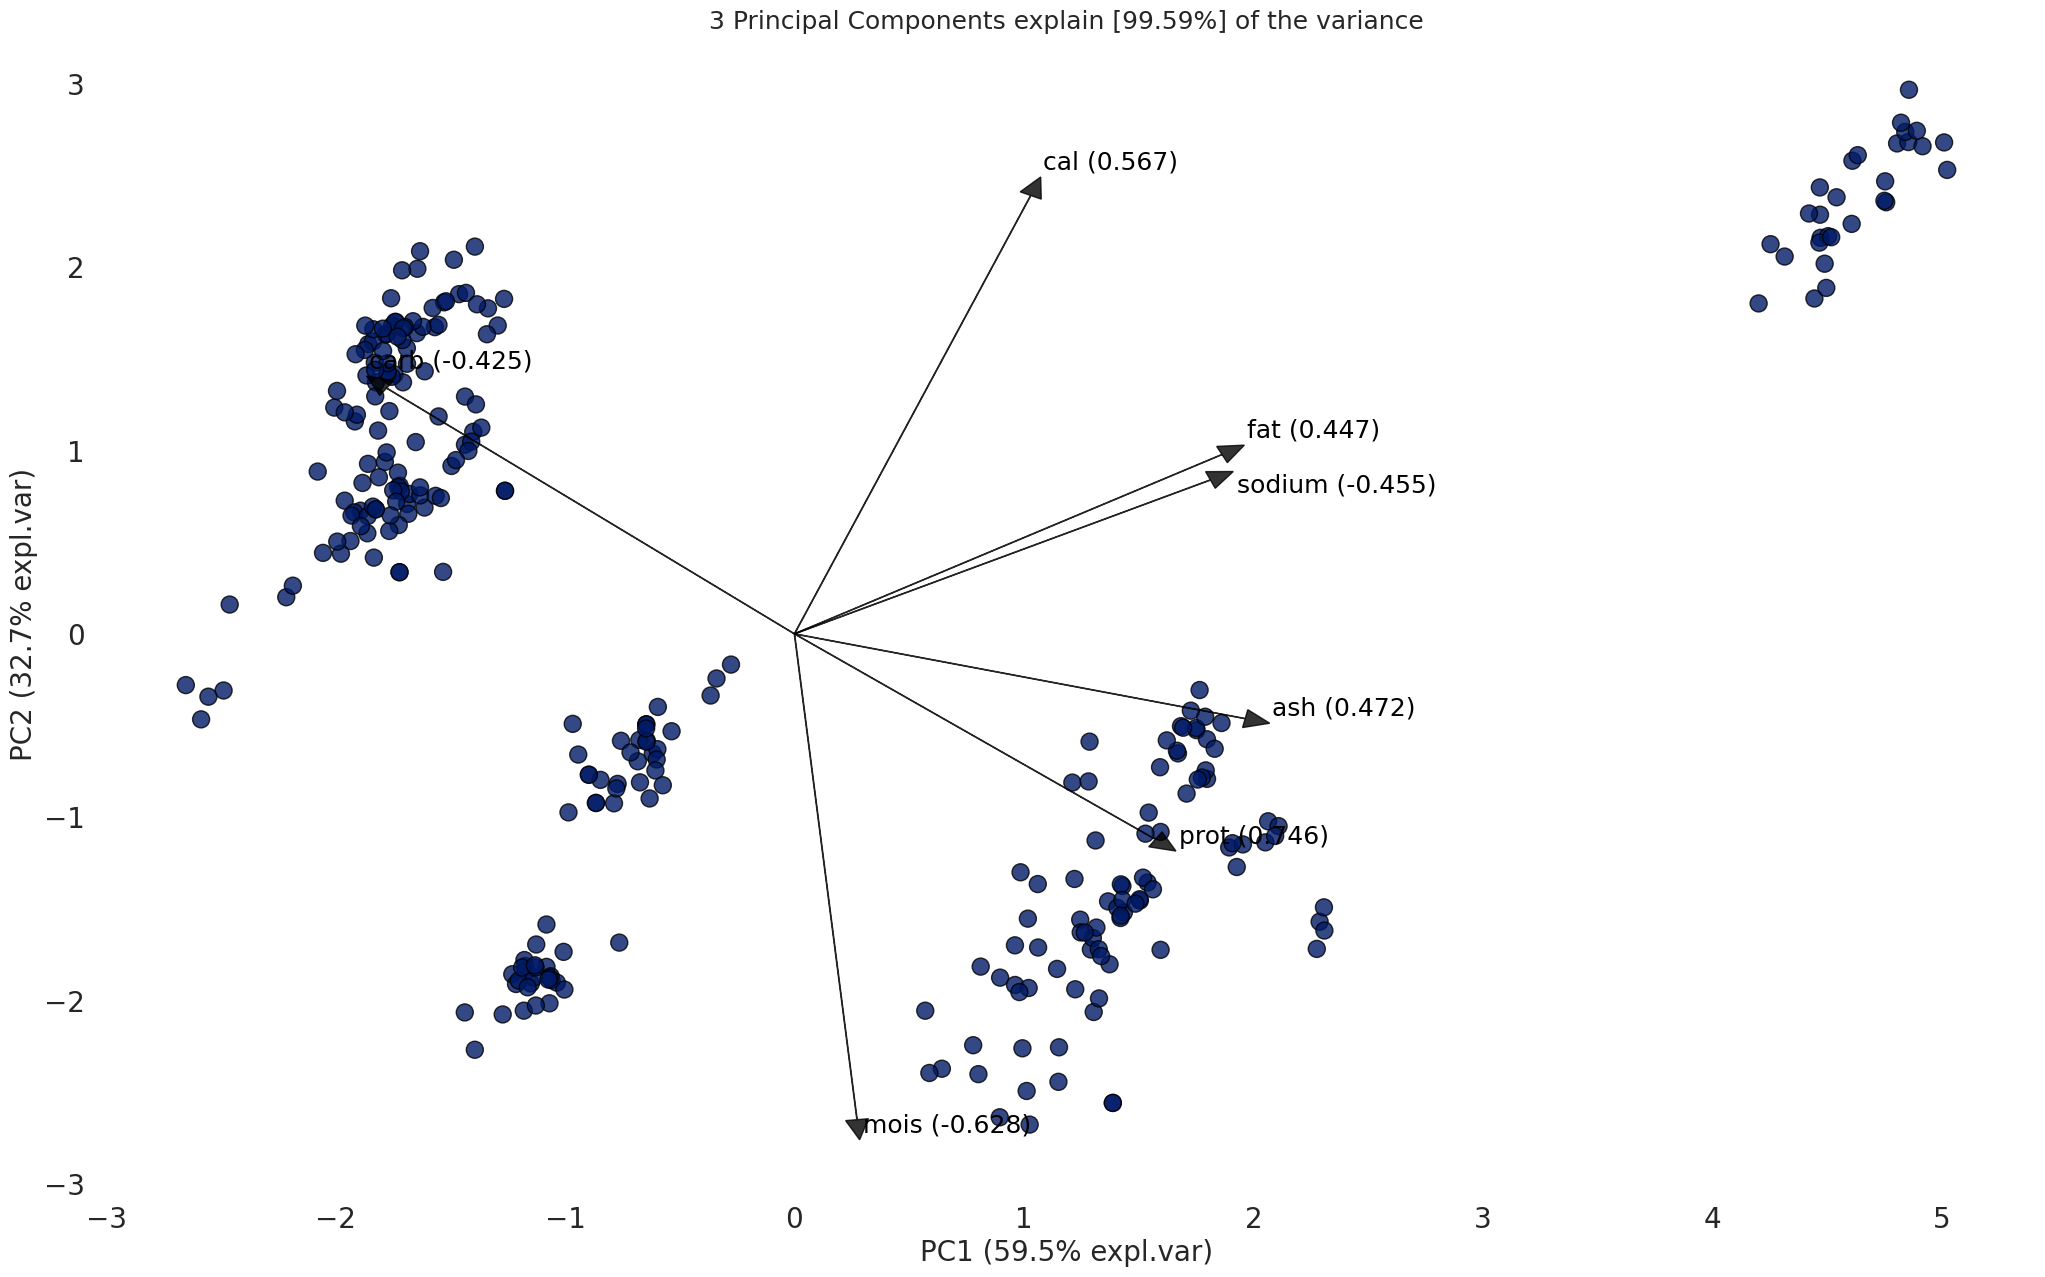

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.59%] of the variance'}, xlabel='PC1 (59.5% expl.var)', ylabel='PC2 (32.7% expl.var)'>)

In [46]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook. The enable_colab() function in PyCaret is used to install and configure all the necessary dependencies to use PyCaret in Google Colab.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (189, 8)
Unseen Data For Predictions: (21, 8)


**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (189, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (132, 7)
12                    Transformed Test Set           (57, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              69fa
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing all Machine Learning Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9769  0.9991  0.9750  0.9813   
ridge                    Ridge Classifier    0.9615  0.0000  0.9617  0.9677   
qda       Quadratic Discriminant Analysis    0.9473  0.9910  0.9433  0.9571   
et                 Extra Trees Classifier    0.9401  0.9958  0.9350  0.9546   
nb                            Naive Bayes    0.9253  0.9823  0.9200  0.9368   
rf               Random Forest Classifier    0.9253  0.9859  0.9200  0.9399   
dt               Decision Tree Classifier    0.9181  0.9399  0.9167  0.9306   
lr                    Logistic Regression    0.9170  0.9881  0.9133  0.9315   
gbc          Gradient Boosting Classifier    0.9104  0.9796  0.9067  0.9260   
knn                K Neighbors Classifier    0.9093  0.9824  0.9067  0.9227   
lightgbm  Light Gradient Boosting Machine    0.9093  0.9894  0.9033  0.9223   
svm                   SVM - Linear Kernel    0.8165  0.0000  0.8200  0.8812   
ada                  Ada Boost Classifier    0.7264  0.8609  0.7117  0.6288   
dummy                    Dummy Classifier    0.3176  0.5000  0.3333  0.1012   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9765  0.9651  0.9675     0.016  
ridge     0.9613  0.9423  0.9453     0.008  
qda       0.9463  0.9202  0.9256     0.029  
et        0.9373  0.9090  0.9177     0.242  
nb        0.9234  0.8868  0.8934     0.010  
rf        0.9224  0.8866  0.8954     0.166  
dt        0.9168  0.8767  0.8835     0.011  
lr        0.9161  0.8748  0.8818     0.355  
gbc       0.9079  0.8647  0.8737     0.328  
knn       0.9102  0.8637  0.8691     0.014  
lightgbm  0.9086  0.8631  0.8693     0.183  
svm       0.8092  0.7264  0.7588     0.013  
ada       0.6459  0.5832  0.6670     0.073  
dummy     0.1534  0.0000  0.0000     0.011

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7143  0.7889  0.7000  0.7143  0.7143  0.5692  0.5692
1       0.9286  0.9500  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9444  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.9231  0.9444  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.8462  0.8889  0.8333  0.8974  0.8359  0.7679  0.7968
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9181  0.9399  0.9167  0.9306  0.9168  0.8767  0.8835
SD      0.0819  0.0603  0.0869  0.0792  0.0828  0.1235  0.1215

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8921  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.8571  0.9500  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.9231  0.9359  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9290  0.9167  0.9359  0.9211  0.8829  0.8911
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9407  0.9651  0.9383  0.9554  0.9397  0.9105  0.9181
SD      0.0541  0.0377  0.0573  0.0388  0.0553  0.0816  0.0737

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [ ]:
#Update statmodels
#!pip3 install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9286  0.9889  0.9167  0.9405  0.9267  0.8915  0.8985
1       0.8571  0.9813  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.8462  0.9829  0.8333  0.8462  0.8462  0.7679  0.7679
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8462  0.9674  0.8500  0.8615  0.8449  0.7679  0.7748
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9658  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9093  0.9824  0.9067  0.9227  0.9102  0.8637  0.8691
SD      0.0747  0.0195  0.0750  0.0661  0.0727  0.1118  0.1095

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9778  0.8667  0.9048  0.8635  0.7879  0.8062
1       0.8571  0.9500  0.8667  0.9048  0.8635  0.7879  0.8062
2       0.8462  0.8889  0.8333  0.8462  0.8462  0.7679  0.7679
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9861  0.9167  0.9359  0.9211  0.8829  0.8911
6       0.9231  0.9375  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.8803  0.7667  0.8000  0.7778  0.6549  0.6607
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9176  0.9621  0.9167  0.9327  0.9193  0.8764  0.8823
SD      0.0785  0.0440  0.0789  0.0669  0.0759  0.1174  0.1137

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9849  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9849  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9829  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.8462  0.9904  0.8500  0.8615  0.8449  0.7679  0.7748
6       0.9231  0.9818  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9562  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9170  0.9881  0.9133  0.9315  0.9161  0.8748  0.8818
SD      0.0717  0.0129  0.0741  0.0613  0.0711  0.1078  0.1041

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9286  1.0000  0.9167  0.9405  0.9267  0.8915  0.8985
1       0.9286  0.9849  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  0.9904  0.9167  0.9359  0.9211  0.8829  0.8911
6       0.9231  0.9562  0.9167  0.9359  0.9211  0.8829  0.8911
7       0.7692  0.9744  0.7667  0.8000  0.7778  0.6549  0.6607
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9319  0.9897  0.9283  0.9432  0.9319  0.8973  0.9025
SD      0.0638  0.0138  0.0650  0.0551  0.0618  0.0955  0.0935

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
tuned_lr

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9325  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.8571  0.9698  0.8500  0.8571  0.8571  0.7846  0.7846
2       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9733  0.8333  0.8901  0.8333  0.7636  0.7937
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9253  0.9859  0.9200  0.9399  0.9224  0.8866  0.8954
SD      0.0568  0.0208  0.0627  0.0468  0.0602  0.0867  0.0795

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8627  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9425  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  0.9316  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.9231  0.9290  0.9167  0.9359  0.9211  0.8829  0.8911
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.9444  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9478  0.9610  0.9450  0.9592  0.9462  0.9210  0.9275
SD      0.0468  0.0445  0.0522  0.0354  0.0494  0.0713  0.0642

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9286  1.0000  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9698  0.9991  0.9700  0.9758  0.9695  0.9546  0.9577
SD      0.0370  0.0026  0.0371  0.0296  0.0374  0.0557  0.0519

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 11
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (210, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (146, 3)
12                    Transformed Test Set           (64, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f99a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lda          Linear Discriminant Analysis    0.9310  0.9916  0.9317  0.9407   
nb                            Naive Bayes    0.9243  0.9924  0.9261  0.9367   
et                 Extra Trees Classifier    0.9243  0.9890  0.9250  0.9329   
lightgbm  Light Gradient Boosting Machine    0.9243  0.9741  0.9261  0.9294   
rf               Random Forest Classifier    0.9176  0.9816  0.9206  0.9314   
gbc          Gradient Boosting Classifier    0.9176  0.9790  0.9211  0.9281   
lr                    Logistic Regression    0.9105  0.9926  0.9128  0.9232   
svm                   SVM - Linear Kernel    0.9105  0.0000  0.9128  0.9242   
knn                K Neighbors Classifier    0.9038  0.9832  0.9072  0.9105   
qda       Quadratic Discriminant Analysis    0.9038  0.9902  0.9044  0.9156   
ridge                    Ridge Classifier    0.9033  0.0000  0.9061  0.9198   
dt               Decision Tree Classifier    0.8905  0.9165  0.8911  0.8975   
ada                  Ada Boost Classifier    0.8514  0.9675  0.8361  0.8670   
dummy                    Dummy Classifier    0.3495  0.5000  0.3333  0.1226   

              F1   Kappa     MCC  TT (Sec)  
lda       0.9305  0.8955  0.9001     0.010  
nb        0.9236  0.8855  0.8918     0.011  
et        0.9231  0.8855  0.8899     0.150  
lightgbm  0.9231  0.8859  0.8893     0.064  
rf        0.9153  0.8759  0.8834     0.174  
gbc       0.9153  0.8759  0.8825     0.180  
lr        0.9098  0.8646  0.8710     0.026  
svm       0.9101  0.8647  0.8710     0.014  
knn       0.9027  0.8550  0.8591     0.017  
qda       0.9032  0.8540  0.8596     0.011  
ridge     0.9009  0.8544  0.8633     0.009  
dt        0.8887  0.8343  0.8395     0.010  
ada       0.8384  0.7698  0.7940     0.073  
dummy     0.1814  0.0000  0.0000     0.019

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9333  0.9785  0.9444  0.9444  0.9333  0.8993  0.9054
1       0.9333  1.0000  0.9444  0.9467  0.9340  0.9000  0.9061
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8667  1.0000  0.8333  0.9048  0.8556  0.7945  0.8176
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000  0.9444  0.9444  0.9333  0.8993  0.9054
6       0.9286  0.9603  0.9333  0.9405  0.9278  0.8923  0.8993
7       0.7857  0.9770  0.7833  0.8095  0.7915  0.6769  0.6822
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9381  0.9916  0.9383  0.9490  0.9376  0.9062  0.9116
SD      0.0662  0.0136  0.0710  0.0565  0.0662  0.1003  0.0964

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.1,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.1,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.1,
                           solver='eigen', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties. 

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 41.7 MB/s eta 0:00:00


In [ ]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9076  0.8333  0.8514  0.7815  0.7039  0.7381
1       0.9333  1.0000  0.9444  0.9467  0.9340  0.9000  0.9061
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8667  0.9806  0.8333  0.9048  0.8556  0.7945  0.8176
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  0.9896  0.9444  0.9444  0.9333  0.8993  0.9054
6       0.8571  0.9762  0.8667  0.8571  0.8571  0.7846  0.7846
7       0.7857  0.9619  0.7833  0.8095  0.7915  0.6769  0.6822
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9176  0.9816  0.9206  0.9314  0.9153  0.8759  0.8834
SD      0.0807  0.0276  0.0796  0.0683  0.0834  0.1212  0.1145

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.8784  0.8333  0.8514  0.7815  0.7039  0.7381
1       0.9333  0.9865  0.9444  0.9467  0.9340  0.9000  0.9061
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8667  1.0000  0.8333  0.9048  0.8556  0.7945  0.8176
4       0.9333  1.0000  0.9333  0.9429  0.9322  0.8980  0.9042
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.8571  0.9603  0.8667  0.8571  0.8571  0.7846  0.7846
7       0.7857  0.9310  0.7833  0.8095  0.7915  0.6769  0.6822
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9286  1.0000  0.9333  0.9429  0.9286  0.8931  0.9000
Mean    0.9105  0.9756  0.9128  0.9255  0.9080  0.8651  0.8733
SD      0.0761  0.0392  0.0750  0.0646  0.0787  0.1142  0.1080

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


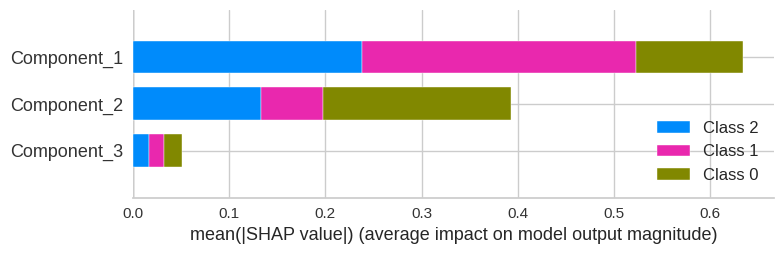

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
